In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
import keyroom
import jax
import jax.numpy as jnp
# from gymnax.visualize import Visualizer
import visualizer
from xminigrid.rendering.rgb_render import render
import numpy as np
from IPython.display import Image
import minigrid_common
import networks

/Users/wilka/miniforge3/envs/jaxneurorl/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
import json

# Open the file and load the JSON data
with open("maze_pairs.json", "r") as file:
    maze_config = json.load(file)[0]

In [4]:
from pprint import pprint


pprint(maze_config)

env = keyroom.KeyRoom(
    maze_config=keyroom.shorten_maze_config(maze_config, 1))
env_params = env.default_params()
env_params

{'keys': [['key', 'grey'],
          ['key', 'red'],
          ['key', 'purple'],
          ['key', 'yellow']],
 'pairs': [[['box', 'blue'], ['ball', 'blue']],
           [['box', 'purple'], ['box', 'green']],
           [['ball', 'green'], ['box', 'yellow']],
           [['key', 'blue'], ['key', 'green']]]}


KeyRoomEnvParams(height=19, width=19, view_size=7, render_mode='rgb_array', random_door_loc=False, training=True)

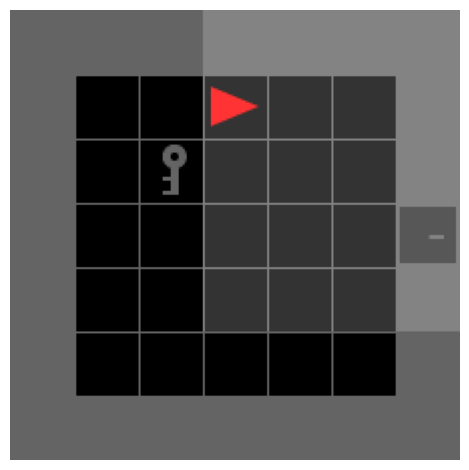

Observation(image=(7, 7, 34), task_w=(4,), state_features=(4,), has_occurred=(4,), pocket=(29,))

In [5]:
rng = jax.random.PRNGKey(2)
rng, rng_ = jax.random.split(rng)
timestep = env.reset(rng_, env_params)

# get image of full state
# state_image = env.render(env_params, timestep)
# visualizer.display_image(state_image)

# get image of what agent observes (theirs is symbolic)
obs_image = keyroom.render_room(timestep.state)
visualizer.display_image(obs_image)

jax.tree_map(lambda x:x.shape, timestep.observation)

In [13]:
encoder = networks.KeyroomObsEncoder(hidden_dim=128)
params = encoder.init(rng, timestep.observation)
encoded_obs = encoder.apply(params, timestep.observation)

In [14]:
encoded_obs.shape

(1152,)